<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
from numpy.linalg import norm

In [80]:
u12 = np.array([5, 4, 2, 1])
u21 = np.array([5, 3, 2, 1])

u13 = np.array([5, 1, 4, 2, 1])
u31 = np.array([1, 4, 2, 5, 4])

In [81]:
u12.dot(u21)

42

In [82]:
norm(u12)

6.782329983125268

In [83]:
(u12.dot(u21)) / (norm(u12) * norm(u21))

0.9916035457647598

In [84]:
(u13.dot(u31)) /(norm(u13) * norm(u31))

0.5742710457985438

In [85]:
(0.99*2 + 0.57*5) / (0.99 + 0.57)

3.0961538461538463

# Collaborative Filtering

In [86]:
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [87]:
R = np.array([[5, 3, 0, 1],
              [4, 0, 3, 1],
              [1, 1, 0, 5],
              [1, 0, 0, 4],
              [0, 1, 5, 4]], dtype=float)

U, sigma, Vt = svds(R, k=2)

In [88]:
U

array([[-0.74320914, -0.40899704],
       [-0.3442087 , -0.41930566],
       [ 0.22495939, -0.46080121],
       [ 0.18803495, -0.35858754],
       [ 0.49314975, -0.56212224]])

In [89]:
sigma

array([5.81972146, 9.41739755])

In [90]:
Vt

array([[-0.80414264, -0.25972348,  0.24625279,  0.47461342],
       [-0.48225601, -0.23891044, -0.43202256, -0.72367635]])

In [91]:
sigma = np.diag(sigma)

In [92]:
sigma

array([[5.81972146, 0.        ],
       [0.        , 9.41739755]])

In [93]:
predicted_matrix = np.dot(np.dot(U, sigma), Vt)

In [94]:
predicted_matrix

array([[5.33563371, 2.0435826 , 0.59890614, 0.73454399],
       [3.51517466, 1.46367965, 1.2126636 , 1.90688502],
       [1.03998884, 0.69673312, 2.1971771 , 3.76179275],
       [0.74857775, 0.52257305, 1.72840065, 2.96320181],
       [0.24504777, 0.51932216, 2.99375423, 5.19308393]])

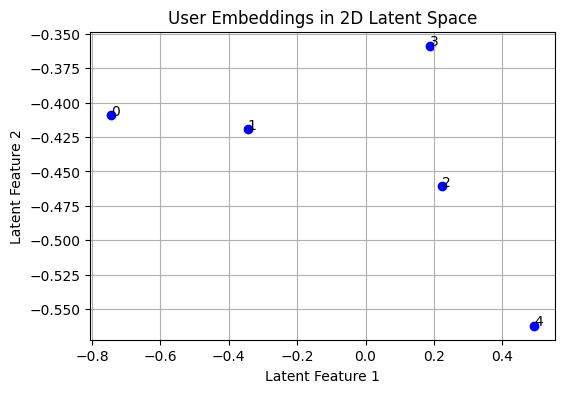

In [95]:
plt.figure(figsize=(6,4))
plt.scatter(U[:,0], U[:,1], c="blue")
plt.xlabel("Latent Feature 1")
plt.ylabel("Latent Feature 2")
plt.title("User Embeddings in 2D Latent Space")
for i, txt in enumerate(range(U.shape[0])):
  plt.annotate(txt, (U[i,0], U[i,1]))
plt.grid()
plt.show()

# Content-Based

In [96]:
import pandas as pd

In [97]:
data = {
    "Movie": ["Movie1", "Movie2", "Movie3", "Movie4", "Movie5",
              "Movie6", "Movie7", "Movie8", "Movie9", "Movie10"],
    "Genres": ["Action Adventure", "Acction Sci-Fi", "Romance Drama", "Comedy", "Horror Thriller",
               "Documentary", "Animation", "Action Comedy", "Sci-Fi Thriller", "Romance Comedy"]
}

df = pd.DataFrame(data)

In [98]:
df.shape

(10, 2)

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100, stop_words="english")
tfidf_matrix = tfidf.fit_transform(df["Genres"])

In [100]:
tfidf_matrix

<10x12 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [101]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [102]:
cosine_sim

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.48746406, 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.62772287, 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.48746406],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.65845424, 0.        , 0.65845424],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.37394332, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.48746406, 0.        , 0.       

In [103]:
# Function to get movie recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
  # Get the index of the movie that matches the title
  idx = df.index[df["Movie"] == title].tolist()[0]

  # Get the pairwaise similarity scores of all movies with that movie
  sim_scores = list(enumerate(cosine_sim[idx]))

  # Sort the movies based on the similarity scores
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Get the scores of the 10 most similar movies
  sim_scores = sim_scores[1:11]

  # Get the movie indices
  movie_indices = [i[0] for i in sim_scores]

  # Return the top 10 most similar movies
  return df["Movie"].iloc[movie_indices]

recommended_movies = get_recommendations("Movie2")
print("Recommended movies for a user who watched 'Movie2':")
print(recommended_movies)

Recommended movies for a user who watched 'Movie2':
8     Movie9
0     Movie1
2     Movie3
3     Movie4
4     Movie5
5     Movie6
6     Movie7
7     Movie8
9    Movie10
Name: Movie, dtype: object
